<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Julia Dominguez Russell y Gerardo Gutiérrez Estrada 

**Fecha:** 10 de marzo del 2023.

**Expediente** : 729878
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/JuliaDomRuss/Tarea4_JMDom-nguez_GGutierrez

# Tarea 4: Clase 9 y 10

### Ejercicio 1:
> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.
    
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).

Código de solución estudiante 1

In [3]:
# Importamos las librerías principales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st    
from math import factorial as fac 
from scipy.special import comb 
import math

$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ 

Obtenemos la función inversa:

$$\frac{2}{\pi}\sin^{-1}(\sqrt x)=U$$

$$\sin^{-1}(\sqrt x)= \frac{U\pi}{2}$$

$$\sin{\sin^{-1}(\sqrt x)}= \sin{\frac{U\pi}{2}}$$

$$\sqrt x= \sin{\frac{U\pi}{2}}$$

$$(\sqrt x)^2= (\sin{\frac{U\pi}{2}})^2$$

$$x= \sin^2{\frac{U\pi}{2}}$$

In [4]:
def D_sin (N):
    return (np.sin((np.random.rand(N)*np.pi)/2))**2

0.49997360593904855


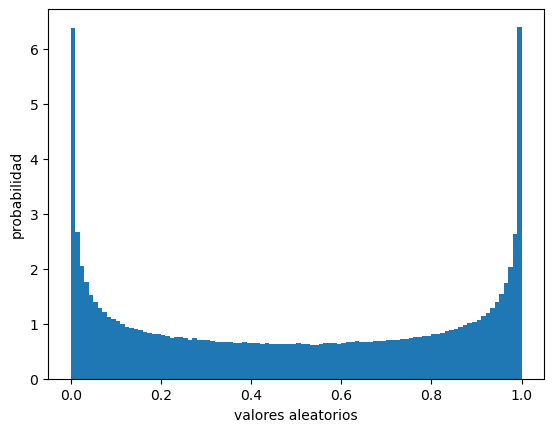

In [5]:
#Generación variable aleatoria continua
N= 10**6
x= D_sin(N)

# Graficamos el histograma para x
plt.hist(x,100,density=True)
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
print(np.mean(x))
plt.show()


In [6]:
#Generación variable aleatoria Discreta

def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    v = {i: val for i, val in enumerate(indices)}
    # Series de los valores aletorios generados
    resultado = pd.Series([sum([1 for i in p_acum if i<ui]) for ui in U]).map(v)

    return resultado

In [7]:
n = 10
p= 0.7
i= np.arange(0,n+1)

def P_acum_Binomial(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)
p_acum = P_acum_Binomial(n,p)

In [8]:
N = 10**4

binomial = Gen_distr_discreta(p_acum, i, N)
binomial

0       8
1       6
2       6
3       5
4       8
       ..
9995    6
9996    5
9997    8
9998    8
9999    6
Length: 10000, dtype: int32

In [9]:
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()

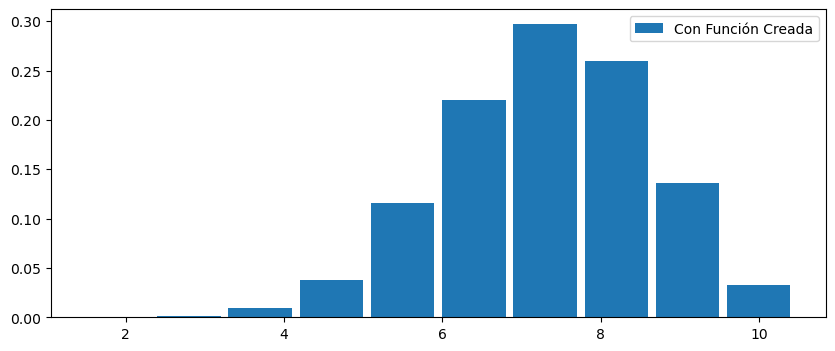

In [10]:
plot_histogram_discrete(binomial, 'Con Función Creada' )

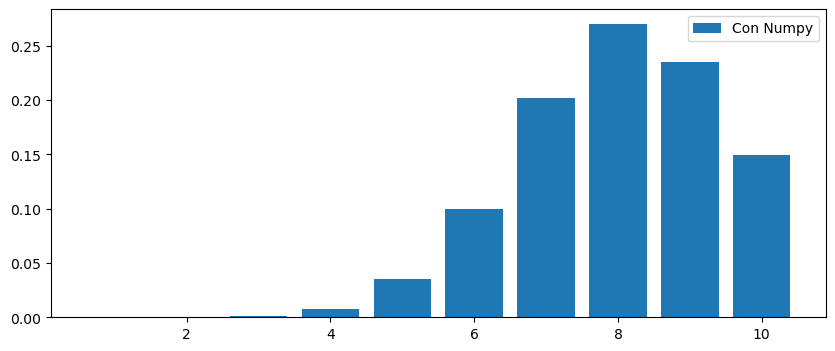

In [11]:
binomial_np= np.random.binomial(n,p,N)
plot_histogram_discrete(binomial_np, 'Con Numpy' )

Código de solución estudiante 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

0.5002167878429615


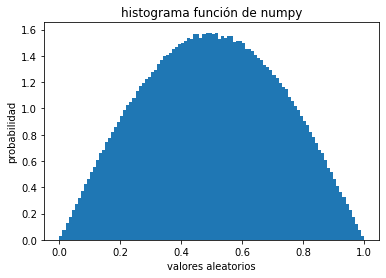

In [22]:
# Código de solución estudiante 1
def funcion(N):
    return 2/np.pi*np.arcsin(np.sqrt(np.random.random(N)))

# Número de muestras
N = 10**6 

# creamos muestras exponenciales con la función creada
x = funcion(N)

# Graficamos el histograma para x
plt.hist(x,100,density=True)
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('histograma función de numpy')
print(np.mean(x))
plt.show()

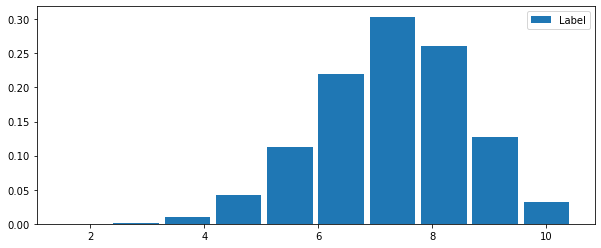

In [7]:
def plot_histogram_discrete(distribucion:'señal de variables aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()
    
# def D_binomial_intermedia(n,p,N):
n = 10; p = 0.7; N = 10**4

p_acum = P_acum_Binomial_o(n,p)

# Usando numpy
d_bino_numpy = np.random.binomial(n,p,N)

plot_histogram_discrete(d_bino_numpy,"Label")

### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........

### Ejercicio 2:
Demostrar la validez de la siguiente ecuación
>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$
**El Algoritmo que debemos realizar:**
   1. Generar $U$.
   2. Si $U<p_0$, poner $X=0$ y detenerse.
   3. Si $p_0<U<p_0+p_1$, poner $X=1$ y detenerse.
   $$ \vdots$$
   4. Si $p_0+\cdots+p_{n-1}<U<p_0+\cdots+p_{n}$, poner $X=n$ y detenerse.

Código de solución estudiante 1

In [12]:
# Código de solución estudiante 1
n= 10
p= 0.7
i= np.arange(0,n+1)
def P(p,n,i):
    return comb(n,i)*p**i*(1-p)**(n-i)

a= P(p,n,i)
a

array([5.90490000e-06, 1.37781000e-04, 1.44670050e-03, 9.00169200e-03,
       3.67569090e-02, 1.02919345e-01, 2.00120949e-01, 2.66827932e-01,
       2.33474440e-01, 1.21060821e-01, 2.82475249e-02])

In [13]:
j= np.arange(0,n)
b= [a[0]]
for i in j:
    b.append(b[-1]*((n-i)/(i+1))*(p/(1-p)))
b

[5.9049000000000085e-06,
 0.00013778100000000018,
 0.0014467005000000017,
 0.009001692000000009,
 0.03675690900000003,
 0.10291934520000008,
 0.20012094900000013,
 0.26682793200000016,
 0.2334744405000001,
 0.12106082100000003,
 0.028247524900000005]

Se puede observar que $a$ (los $p_i$ obtenidos con la PMF) y $b$ (los $p_i$ obtenidos con la ecuación recursiva) son iguales. Demostrando así la validez de la ecuación.

Que la ecuación sea recursiva nos permite calcular el valor de $p_{i+1}$ de una manera sencilla y eficiente. La ecuación recursiva es más eficiente que la ecuación factorial original, y utiliza calculos mucho más sencillos.

Ahora validemos la ecuación matemáticamente.

La distribución de probabilidad es:
$$P(X=i)={n \choose i}p^i(1-p)^{n-i}$$

Escribimos la ecuación para $i+1$ y la desarrollamos:

\begin{align}
P(X= i+1 )&={n \choose i}p^{i+1}(1-p)^{n-(i+1)}\\
&= \frac{n!}{(n-i-1)!(i+1)!}p^{i+1}(1-p)^{n-(i+1)}\\
&= \frac{n!(n-x)}{(n-x)!x!(i+1)}p^i(1-p)^{n-i} \frac{p}{1-p} \\
&= (\frac{n-i}{i+1})(\frac{p}{1-p})\frac{n!}{(n-i)!x!}p^i(1-p)^{n-i}\\
&= (\frac{n-i}{i+1})(\frac{p}{1-p}) P(X=i)\\
&= \frac{n-i}{i+1}\frac{p}{1-p} p_i
\end{align}

In [14]:
# Algoritmo que debemos realizar:
n= 10
p= 0.7
i= np.arange(0,n+1)

def algoritmo (p,n,i):
    P = lambda p,n,m:comb(n,m)*p**m*(1-p)**(n-m)
    X= P(p,n,i)
    x= None
    while x==None: 
        U= np.random.rand()
        if U<X[0]:
            x=0
            return x
            break
        elif X[0]<U and U<(X[0]+X[1]):
            x=1
            return x
            break
        elif np.sum(X[:-1])<U and U<np.sum(X):
            x=n
            return x
            break
        
algoritmo(p,n,i)   

10

Código de solución estudiante 2

In [ ]:
# Código de solución estudiante 2
.
.
.
.


### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........

### Ejercicio 3:

Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

$
\begin{aligned}
\frac{p_{k+1}}{p_k}& = \frac{e^{-\lambda}(\lambda)^k}{k!} \\
& = \frac{e^{-\lambda}(\lambda)^k}{k!}
\end{aligned}
$

Código de solución estudiante 1

Para demostrar la validez de la ecuación calcularemos $p_{i}$ con la PMF de la distribución binomial, que es:

PMF $\rightarrow p_i=P(X=i)={n \choose i}p^i(1-p)^{n-i}, \quad i=0,1,\cdots,n$

Y los compararemos con los $p_{i}$ obtenidos con la ecuación recursiva:

$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $


Código de solución estudiante 1

\begin{align}
\frac{P(X=k+1)}{P(X=k)} &= \frac{\frac{e^{-\lambda}\lambda^{k+1}}{(k+1)!}}{\frac{e^{-\lambda}\lambda^k}{k!}} \\
&= \frac{\lambda^{k+1}k!}{\lambda^k(k+1)!} \\
&= \frac{\lambda}{k+1}
\end{align}

Por lo tanto:

$$P(X=k+1)=\frac{\lambda}{k+1}P(X=k)$$

$$ P(k+1)=\frac{\lambda}{k+1}P(k)$$




In [15]:
# Código de solución estudiante 1

def P_acum_Poisson(lamb,k, n):
    Pr = np.zeros(n)
    Pr[0] = ((np.exp(-lamb))*lamb**0)/ math.factorial(0)
    def pr(k):
        nonlocal Pr
        Pr[k+1]=(lamb/(k+1))*Pr[k]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(k) for k in range(n-1)]
    return np.cumsum(Pr)
lamb= 4
n=10**4
k= np.arange(0,n+1)
p_acum2 = P_acum_Poisson(lamb,k,n)
poisson = Gen_distr_discreta(p_acum2, k, n)

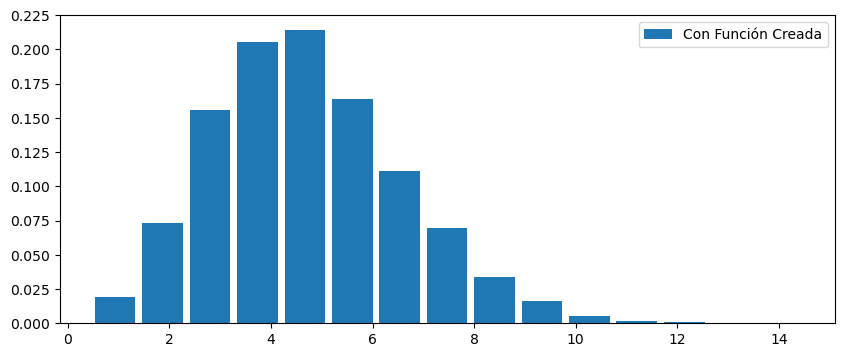

In [16]:
plot_histogram_discrete(poisson, 'Con Función Creada' )

Código de solución estudiante 2

In [ ]:
# Código de solución estudiante 2
.
.
.
.


### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........